<a href="https://colab.research.google.com/github/Percy-O/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_(Crude_Oil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Collection
* Collect the data from yahoo finance
* The Stock code is CL=F
* Convert the collected data into csv

### Scrape Data

In [ ]:
stocks = input ('Enter the code of the Stock to download: ')
data = yf.download(stocks,"2005-01-01", "2024-08-14", auto_adjust=True)
data.head()

Enter the code of the Stock to download: CL=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2005-01-03,43.099998,43.099998,41.250000,42.119999,69484
2005-01-04,42.180000,44.130001,41.849998,43.910000,100665
2005-01-05,43.900002,44.000000,42.599998,43.389999,91011
2005-01-06,43.389999,45.750000,42.799999,45.560001,122411
2005-01-07,45.500000,46.099998,44.750000,45.430000,99725


### Data Shape

In [ ]:
data.shape

(4934, 5)

### Convert collected data into csv

In [ ]:
data.to_csv('crude_oil_stock_price.csv')

### Loading Data

In [ ]:
data = pd.read_csv('crude_oil_stock_price.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,43.099998,43.099998,41.250000,42.119999,69484
1,2005-01-04,42.180000,44.130001,41.849998,43.910000,100665
2,2005-01-05,43.900002,44.000000,42.599998,43.389999,91011
3,2005-01-06,43.389999,45.750000,42.799999,45.560001,122411
4,2005-01-07,45.500000,46.099998,44.750000,45.430000,99725


### Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4934 non-null   object 
 1   Open    4934 non-null   float64
 2   High    4934 non-null   float64
 3   Low     4934 non-null   float64
 4   Close   4934 non-null   float64
 5   Volume  4934 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 231.4+ KB


### Data Statistics

In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,4934.000000,4934.000000,4934.000000,4934.000000,4.934000e+03
mean,71.908549,73.009457,70.714897,71.889864,3.532493e+05
std,21.617835,21.795083,21.436327,21.649891,2.024283e+05
min,-14.000000,13.690000,-40.320000,-37.630001,0.000000e+00
25%,54.627500,55.652501,53.667500,54.575000,2.232788e+05
50%,70.709999,71.849998,69.599998,70.810001,3.105335e+05
75%,88.287500,89.655003,87.087498,88.377499,4.420252e+05
max,145.190002,147.270004,143.220001,145.289993,2.288230e+06


## Data Preprocessing

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4934 non-null   datetime64[ns]
 1   Open    4934 non-null   float64       
 2   High    4934 non-null   float64       
 3   Low     4934 non-null   float64       
 4   Close   4934 non-null   float64       
 5   Volume  4934 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 231.4 KB


In [ ]:
# data.set_index('Date', inplace=True)

In [ ]:
data['year']= data['Date'].dt.year
data['month']= data['Date'].dt.month
data['day']= data['Date'].dt.day

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2005-01-03,43.099998,43.099998,41.250000,42.119999,69484,2005,1,3
1,2005-01-04,42.180000,44.130001,41.849998,43.910000,100665,2005,1,4
2,2005-01-05,43.900002,44.000000,42.599998,43.389999,91011,2005,1,5
3,2005-01-06,43.389999,45.750000,42.799999,45.560001,122411,2005,1,6
4,2005-01-07,45.500000,46.099998,44.750000,45.430000,99725,2005,1,7


# Exploratory Data Analysis

### Relationship between Volume and the target variable (Close)

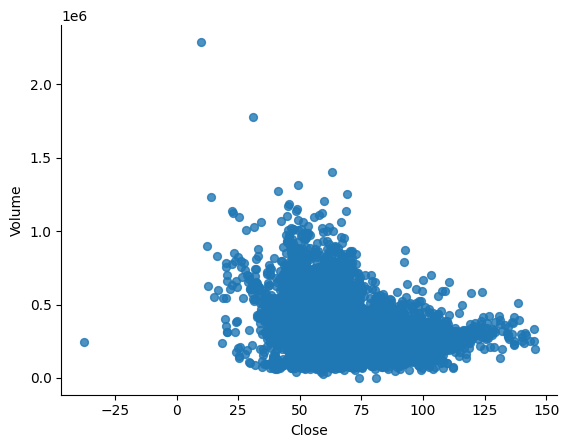

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Open price Over time

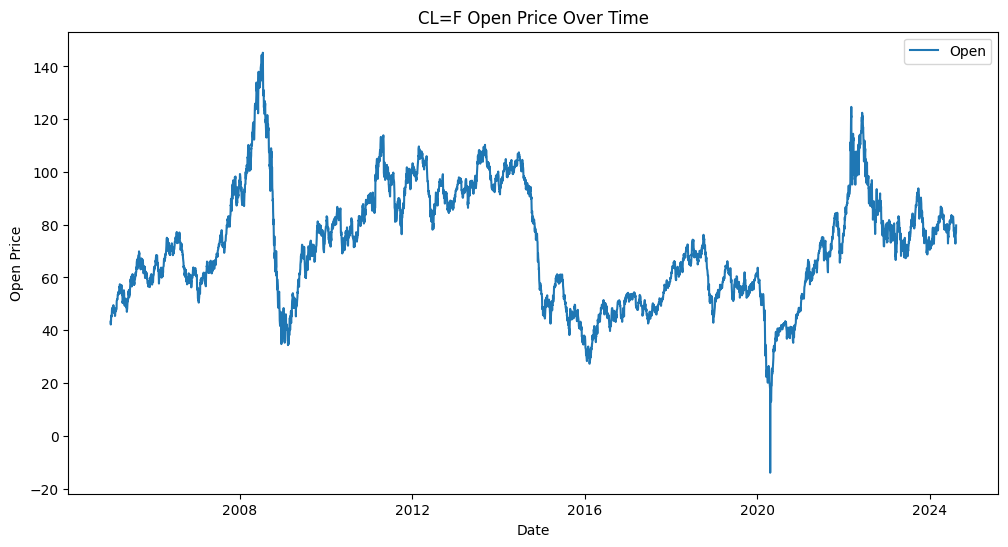

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Open'], label='Open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('{} Open Price Over Time'.format(stocks))
plt.legend()
plt.show()

### Closing Price Over Time

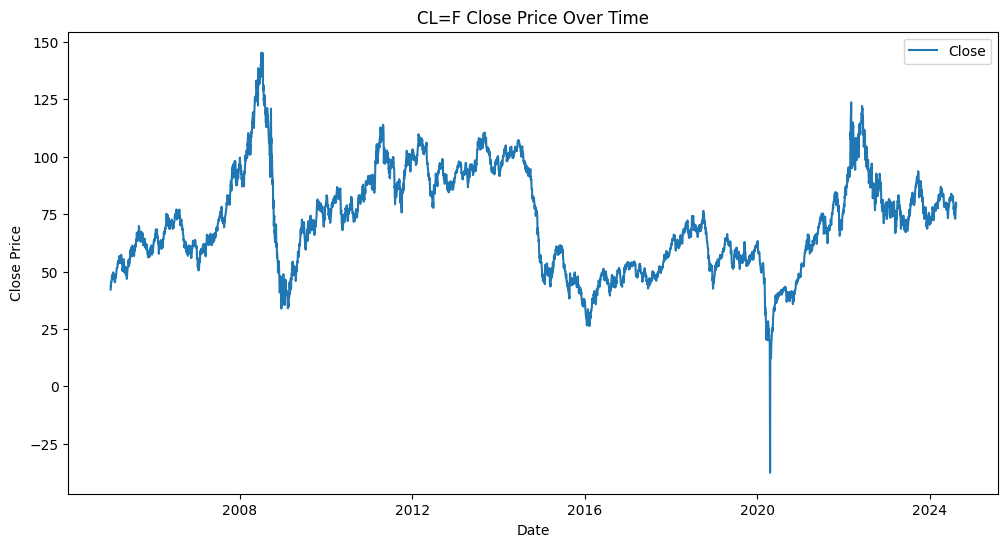

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('{} Close Price Over Time'.format(stocks))
plt.legend()
plt.show()

### High Price Over Time

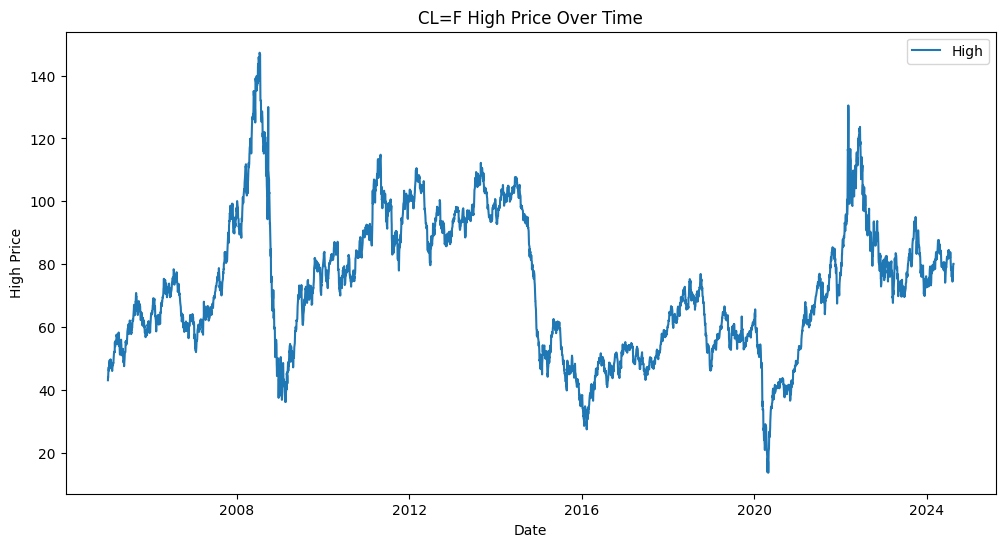

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['High'], label='High')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('{} High Price Over Time'.format(stocks))
plt.legend()
plt.show()

### Low Price Over Time

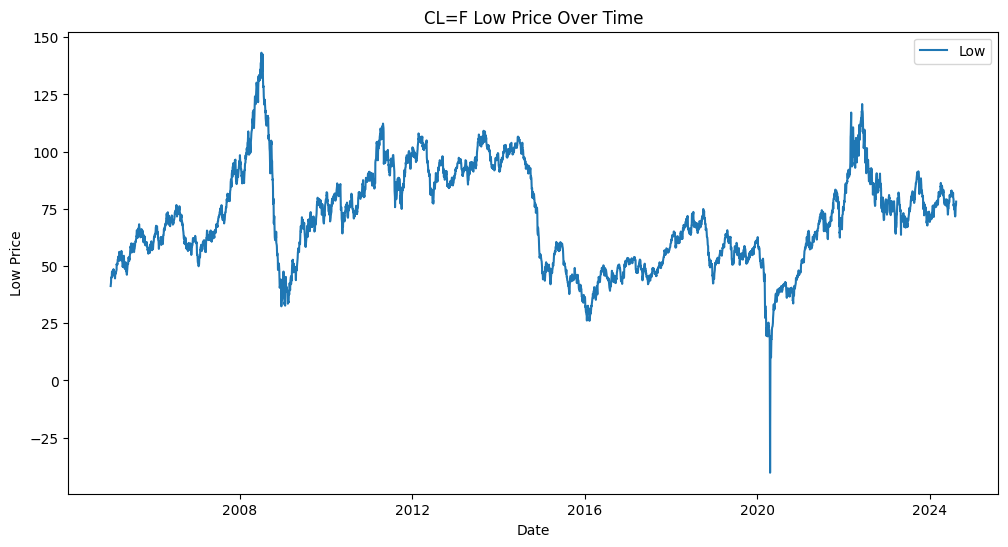

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('{} Low Price Over Time'.format(stocks))
plt.legend()
plt.show()

### Frequency Distribution for Open Price

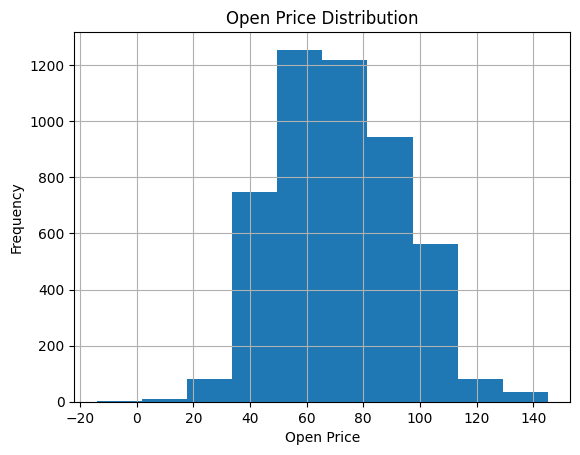

In [ ]:
data['Open'].hist()
plt.title('Open Price Distribution')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

### Frequency Distribution for closing price

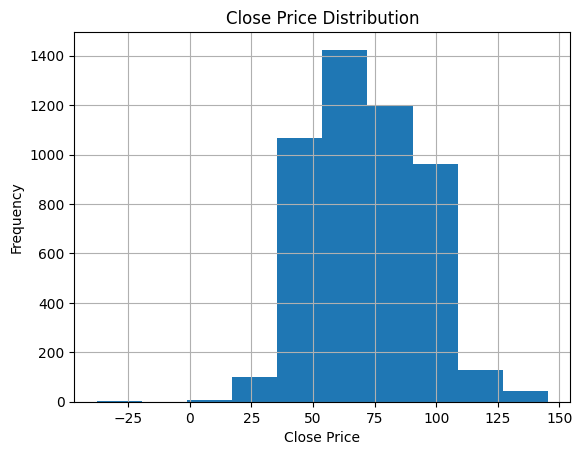

In [ ]:
data['Close'].hist()
plt.title('Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

## Data Correlation

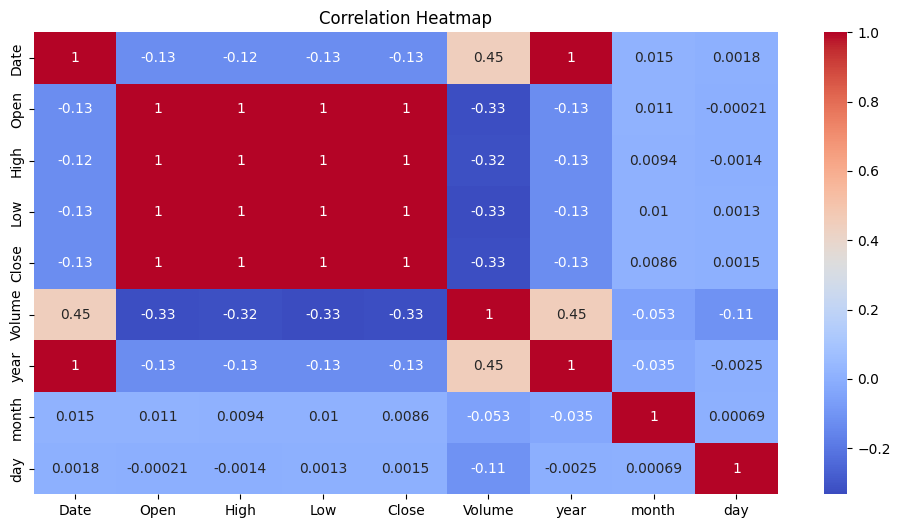

In [ ]:
plt.figure(figsize=(12,6))
corr= data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X = data.drop(['Close','Date'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3947, 7)
(987, 7)
(3947,)
(987,)


### Evaluation Metrics Function

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluation_metrics(model,y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cvs = cross_val_score(model, X, y, cv=5)

    print("R-squared:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Cross-Validation Scores:", cvs)



## Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)
evaluation_metrics(lr,y_test, y_pred_lr)

R-squared: 0.9991316531717818
Mean Absolute Error: 0.4473782832865014
Mean Squared Error: 0.398878802498787
Root Mean Squared Error: 0.6315685255764311
Cross-Validation Scores: [0.99917215 0.99854874 0.9996875  0.9981635  0.99726556]


### Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(X_test)
evaluation_metrics(rf,y_test, y_pred_rf)

R-squared: 0.9984707148895807
Mean Absolute Error: 0.5633452141152082
Mean Squared Error: 0.7024836087383651
Root Mean Squared Error: 0.8381429524480685
Cross-Validation Scores: [0.97947675 0.99769394 0.99947206 0.94989424 0.9964885 ]


### Decision Trees

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(X_test)
evaluation_metrics(dt,y_test, y_pred_dt)

R-squared: 0.9972610556887839
Mean Absolute Error: 0.7175177223414272
Mean Squared Error: 1.2581456987761839
Root Mean Squared Error: 1.1216709405062537
Cross-Validation Scores: [0.97293431 0.99611116 0.99885828 0.9502847  0.99396259]


### Support Vector Machine

In [ ]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [ ]:
y_pred_svm = svm.predict(X_test)
evaluation_metrics(svm,y_test, y_pred_svm)

R-squared: 0.2499219080641375
Mean Absolute Error: 14.519009918500648
Mean Squared Error: 344.55155632438766
Root Mean Squared Error: 18.562099997693895
Cross-Validation Scores: [-0.32293534 -0.20550861  0.18690143 -1.75335163 -0.15853573]


## Accuracy Comparison

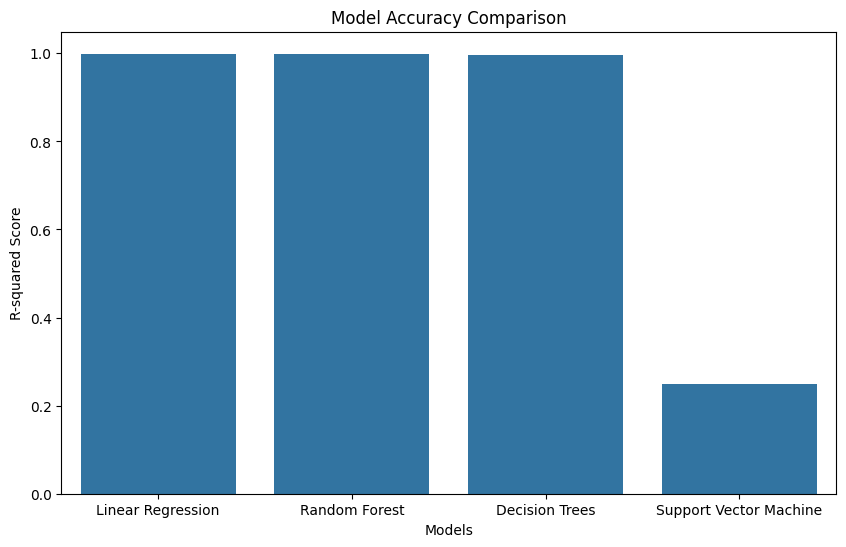

In [ ]:
models = ['Linear Regression', 'Random Forest', 'Decision Trees', 'Support Vector Machine']
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_svm = r2_score(y_test, y_pred_svm)
r2_scores = [r2_lr, r2_rf, r2_dt, r2_svm]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Model Accuracy Comparison')
plt.show()


### data visulization predicted value over the actual value


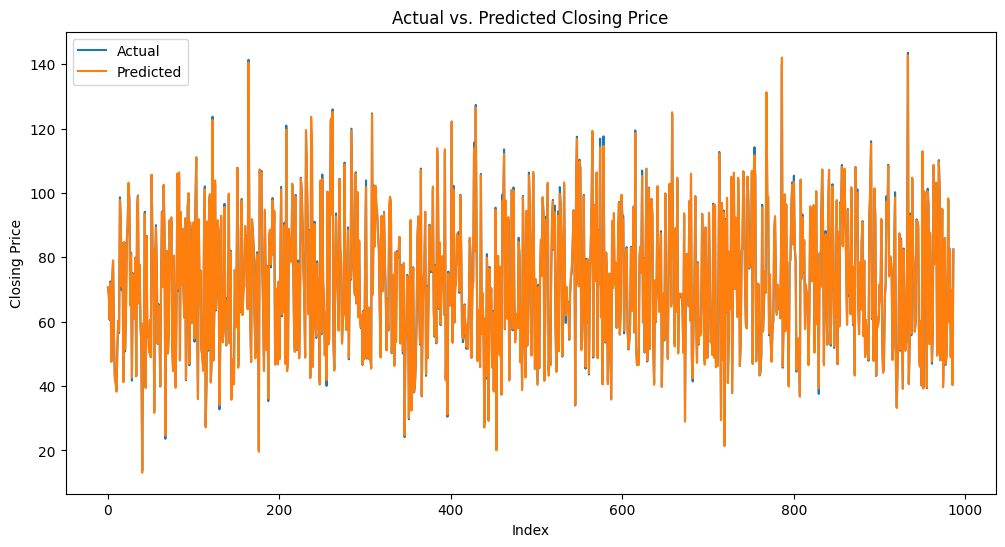

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a new dataframe for predictions
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(data=prediction_df, x=range(len(prediction_df)), y='Actual', label='Actual')
sns.lineplot(data=prediction_df, x=range(len(prediction_df)), y='Predicted', label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Price')

# Add legend and show plot
plt.legend()
plt.show()


## Prediction on new data

In [ ]:
# Select the model with the highest accuracy based on R-squared score
best_model = rf if r2_rf == max(r2_scores) else lr if r2_lr == max(r2_scores) else dt if r2_dt == max(r2_scores) else svm

# New data for prediction
new_data = pd.DataFrame({
    'Open': [100],
    'High': [110],
    'Low': [90],
    'Volume': [100000],
    'year': [2023],
    'month': [6],
    'day': [15]
})

# Predict the closing price using the best model
predicted_price = best_model.predict(new_data)[0]

print(f"Predicted closing price for new data: {predicted_price}")


Predicted closing price for new data: 99.23625434747633


## With new data, we were able to estimate the closing price of the crude oil stock price based on the prediction made above utilizing the highest model accruacy. As a result, we were able to obtain our real-time stock price prediction result. We are able to forecast the closing price from the beginning, even before the day, week, or month ends. We can benefit from machine learning in this way.